In [4]:
import os

folder_path = r"E:\second_project/yaml_files"

# List all files in the folder
file_names = os.listdir(folder_path)

print("📄 Files in folder:")
for name in file_names:
    print("-", name)

📄 Files in folder:
- 2023-10
- 2023-11
- 2023-12
- 2024-01
- 2024-02
- 2024-03
- 2024-04
- 2024-05
- 2024-06
- 2024-07
- 2024-08
- 2024-09
- 2024-10
- 2024-11


In [6]:
import yaml

file_path = r"E:\second_project/yaml_files/2023-10/2023-10-03_05-30-00.yaml"

with open(file_path, 'r') as f:
    data = yaml.safe_load(f)

print("✅ Type of data:", type(data))
print("🔍 Preview:")
if isinstance(data, list):
    for item in data[:2]:
        print(item)
else:
    print(data)


✅ Type of data: <class 'list'>
🔍 Preview:
{'Ticker': 'SBIN', 'close': 602.95, 'date': '2023-10-03 05:30:00', 'high': 604.9, 'low': 589.6, 'month': '2023-10', 'open': 596.6, 'volume': 15322196}
{'Ticker': 'BAJFINANCE', 'close': 7967.6, 'date': '2023-10-03 05:30:00', 'high': 7975.5, 'low': 7755.0, 'month': '2023-10', 'open': 7780.8, 'volume': 944555}


In [8]:
import os
import yaml
import pandas as pd
from collections import defaultdict

# Paths
yaml_root_dir = r"E:\second_project/yaml_files"
csv_output_dir = r"E:/stock analysis//data/csv_by_stocks"
os.makedirs(csv_output_dir, exist_ok=True)

# Store data per ticker
symbol_data = defaultdict(list)

# Loop through each month folder
for month_folder in os.listdir(yaml_root_dir):
    month_path = os.path.join(yaml_root_dir, month_folder)
    if os.path.isdir(month_path):
        for file in os.listdir(month_path):
            if file.endswith(".yaml"):
                file_path = os.path.join(month_path, file)
                with open(file_path, 'r') as f:
                    day_data = yaml.safe_load(f)
                    if isinstance(day_data, list):
                        for record in day_data:
                            ticker = record.get("Ticker")
                            if ticker:
                                record["date"] = file.split("_")[0]  # keep date clean
                                symbol_data[ticker].append(record)

# Save each ticker's data to CSV
for ticker, records in symbol_data.items():
    df = pd.DataFrame(records)
    df.sort_values("date", inplace=True)
    df.to_csv(os.path.join(csv_output_dir, f"{ticker}.csv"), index=False)

print(f"🎯 Completed! {len(symbol_data)} symbols processed.")

🎯 Completed! 50 symbols processed.


In [9]:
import os
import pandas as pd

# Folder containing CSVs for each symbol
csv_folder = r"E:/stock analysis/data/csv_by_stocks"

stock_returns = []

# Loop through each stock CSV
for file in os.listdir(csv_folder):
    if file.endswith(".csv"):
        filepath = os.path.join(csv_folder, file)
        df = pd.read_csv(filepath)
        
        if df.empty or 'open' not in df.columns or 'close' not in df.columns:
            continue  # Skip files with missing data

        # Sort by date
        df = df.sort_values('date')
        
        # Calculate return
        first_open = df.iloc[0]['open']
        last_close = df.iloc[-1]['close']
        
        if first_open != 0:
            yearly_return = ((last_close - first_open) / first_open) * 100
            stock_returns.append({
                "symbol": file.replace(".csv", ""),
                "first_open": first_open,
                "last_close": last_close,
                "yearly_return": yearly_return
            })

# Convert to DataFrame
returns_df = pd.DataFrame(stock_returns)

# Sort by return
top_gainers = returns_df.sort_values("yearly_return", ascending=False).head(10)
top_losers = returns_df.sort_values("yearly_return", ascending=True).head(10)

# Display
print("📈 Top 10 Gainers:")
print(top_gainers)

print("\n📉 Top 10 Losers:")
print(top_losers)

📈 Top 10 Gainers:
        symbol  first_open  last_close  yearly_return
47       TRENT     2074.30     6652.80     220.725064
8          BEL      137.90      280.85     103.662074
30         M&M     1597.20     3012.95      88.639494
5   BAJAJ-AUTO     5065.00     9481.65      87.199408
9   BHARTIARTL      918.25     1569.30      70.901171
35   POWERGRID      198.75      336.95      69.534591
10        BPCL      174.25      285.85      64.045911
20  HEROMOTOCO     3058.00     4794.10      56.772400
40   SUNPHARMA     1159.55     1795.30      54.827304
17     HCLTECH     1232.50     1898.40      54.028398

📉 Top 10 Losers:
        symbol  first_open  last_close  yearly_return
24  INDUSINDBK     1432.00      998.20     -30.293296
3   ASIANPAINT     3166.10     2472.20     -21.916553
7   BAJFINANCE     7780.80     6683.95     -14.096879
0     ADANIENT     2418.00     2228.00      -7.857734
22  HINDUNILVR     2490.00     2445.25      -1.797189
32   NESTLEIND     2250.69     2247.30      -0

In [10]:
pip install matplotlib

     ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
     ---------------------------------------- 0.0/8.1 MB 1.3 MB/s eta 0:00:07
     ---------------------------------------- 0.1/8.1 MB 1.3 MB/s eta 0:00:07
      --------------------------------------- 0.2/8.1 MB 1.4 MB/s eta 0:00:06
     - -------------------------------------- 0.3/8.1 MB 1.4 MB/s eta 0:00:06
     -- ------------------------------------- 0.4/8.1 MB 1.8 MB/s eta 0:00:05
     --- ------------------------------------ 0.7/8.1 MB 2.6 MB/s eta 0:00:03
     ---- ----------------------------------- 0.9/8.1 MB 2.7 MB/s eta 0:00:03
     ----- ---------------------------------- 1.1/8.1 MB 2.9 MB/s eta 0:00:03
     ------ --------------------------------- 1.4/8.1 MB 3.2 MB/s eta 0:00:03
     ------- -------------------------------- 1.6/8.1 MB 3.4 MB/s eta 0:00:02
     --------- ------------------------------ 2.0/8.1 MB 3.8 MB/s eta 0:00:02
     ---------- ----------------------------- 2.2/8.1 MB 3.9 MB/s eta 0


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


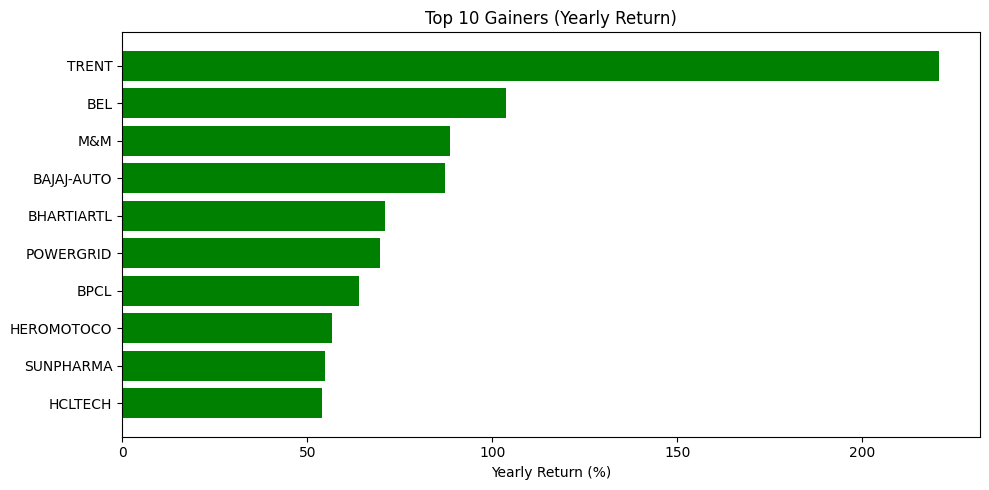

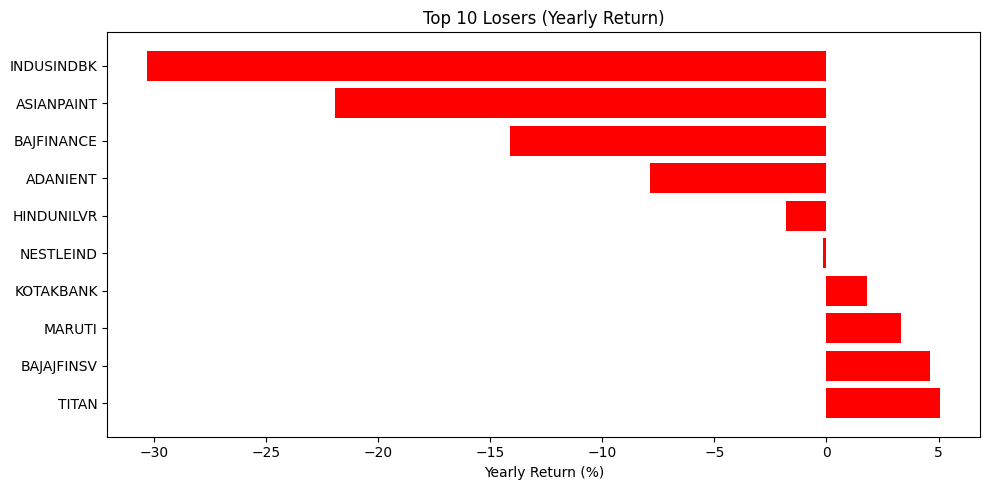

In [11]:
import matplotlib.pyplot as plt

# Plot Top Gainers
plt.figure(figsize=(10, 5))
plt.barh(top_gainers['symbol'], top_gainers['yearly_return'], color='green')
plt.xlabel('Yearly Return (%)')
plt.title('Top 10 Gainers (Yearly Return)')
plt.gca().invert_yaxis()  # Highest at the top
plt.tight_layout()
plt.show()

# Plot Top Losers
plt.figure(figsize=(10, 5))
plt.barh(top_losers['symbol'], top_losers['yearly_return'], color='red')
plt.xlabel('Yearly Return (%)')
plt.title('Top 10 Losers (Yearly Return)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [14]:
import pandas as pd
import os

# Path to folder containing your 50 cleaned stock CSV files
csv_folder = r"E:/stock analysis/data/csv_by_stocks"

# List to hold DataFrames
all_data = []

# Loop through each file in the folder
for file in os.listdir(csv_folder):
    if file.endswith(".csv"):
        file_path = os.path.join(csv_folder, file)
        df = pd.read_csv(file_path)
        df['symbol'] = os.path.splitext(file)[0]  # Extract symbol from file name
        all_data.append(df)

# Combine all into a single DataFrame
merged_df = pd.concat(all_data, ignore_index=True)

# Optional: sort by symbol and date
merged_df['date'] = pd.to_datetime(merged_df['date'])
merged_df = merged_df.sort_values(by=['symbol', 'date'])

# Save the merged CSV
output_path = "E:/stock analysis/all_stocks.csv"
merged_df.to_csv(output_path, index=False)

print(f"✅ Merged CSV saved at: {output_path}")

✅ Merged CSV saved at: E:/stock analysis/all_stocks.csv


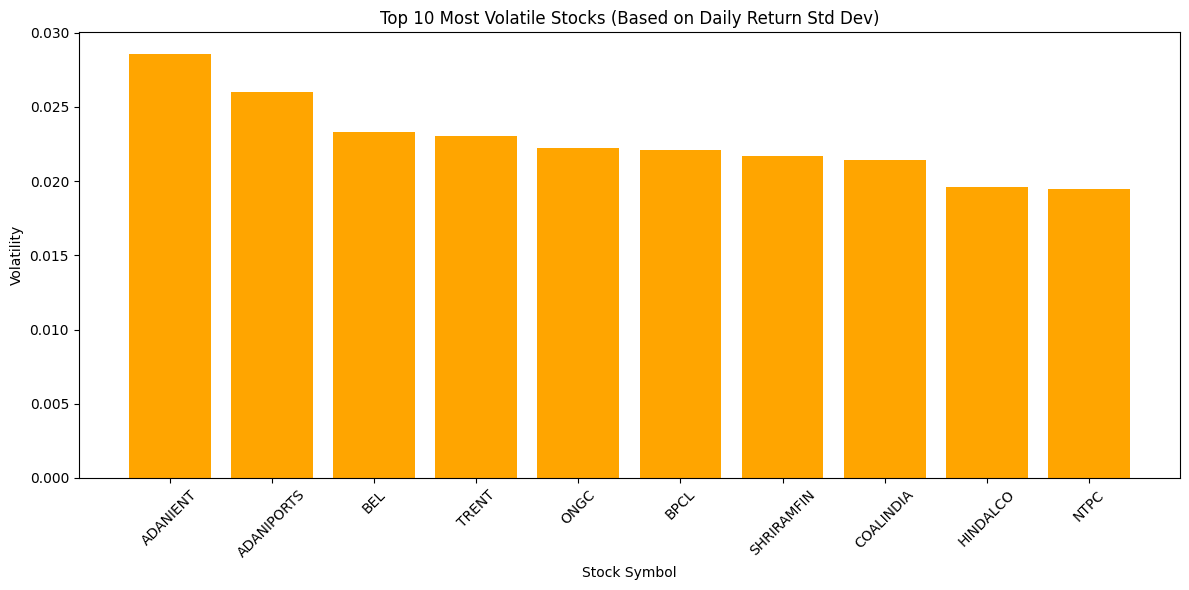

Top 10 most volatile stocks saved as 'top_volatility_stocks.csv'.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("E:/stock analysis/all_stocks.csv")

# Specify the correct date format (e.g., DD-MM-YYYY)
df['date'] = pd.to_datetime(df['date'])

# Ensure the data is sorted by symbol and date
df = df.sort_values(['symbol', 'date'])

# Calculate daily return for each stock
df['daily_return'] = df.groupby('symbol')['close'].pct_change()

# Calculate volatility (standard deviation of daily return)
volatility_df = df.groupby('symbol')['daily_return'].std().reset_index()
volatility_df.columns = ['symbol', 'volatility']

# Get top 10 most volatile stocks
top_volatility = volatility_df.sort_values(by='volatility', ascending=False).head(10)

# Save the top_volatility DataFrame as a CSV file
top_volatility.to_csv('top_volatility_stocks.csv', index=False)

# Plotting
plt.figure(figsize=(12,6))
plt.bar(top_volatility['symbol'], top_volatility['volatility'], color='orange')
plt.title('Top 10 Most Volatile Stocks (Based on Daily Return Std Dev)')
plt.xlabel('Stock Symbol')
plt.ylabel('Volatility')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Top 10 most volatile stocks saved as 'top_volatility_stocks.csv'.")

Data loaded successfully. Shape: (100, 5)

Columns after cleaning: ['symbol', 'year', 'year_start', 'year_end', 'yearly_return']

Using 'yearly_return' column for return calculations

Results saved to: E:/second_project/cumulative_return.csv
Plot saved to: E:/second_project/top5_performers.png


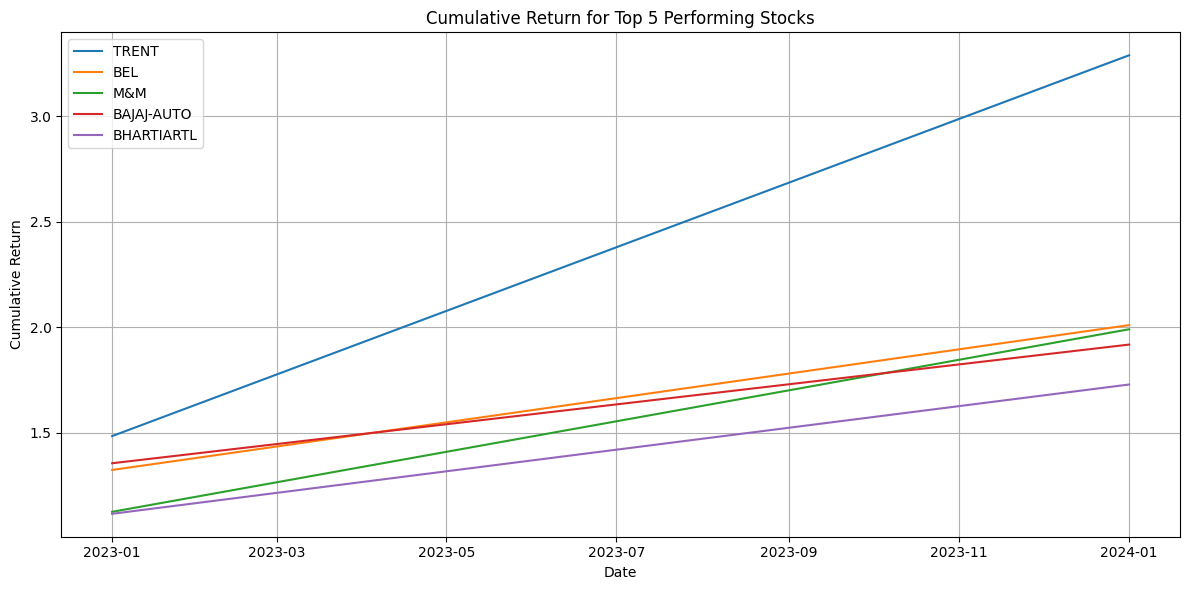

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the full dataset
df = pd.read_csv("all_stocks.csv")

# Clean and standardize column names
df.columns = df.columns.str.strip().str.lower()

# Ensure the date column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Sort by symbol and date
df = df.sort_values(by=["symbol", "date"])

# Calculate daily return
df["daily_return"] = df.groupby("symbol")["close"].pct_change()

# Calculate cumulative return
df["cumulative_return"] = df.groupby("symbol")["daily_return"].transform(lambda x: (1 + x).cumprod())

# Find final cumulative return per stock
final_returns = df.groupby("symbol")["cumulative_return"].last().reset_index()

# Get top 5 performing stocks
top5_symbols = final_returns.sort_values(by="cumulative_return", ascending=False).head(5)["symbol"]

# Filter data for top 5 stocks
top5_data = df[df["symbol"].isin(top5_symbols)]

# Save full cumulative return data
df.to_csv("cumulative_return.csv", index=False)

# Save cumulative return data for top 5 performing stocks
top5_data.to_csv("top5_cumulative_return.csv", index=False)

# Save final returns summary for top 5
top5_final_returns = final_returns[final_returns["symbol"].isin(top5_symbols)]
top5_final_returns.to_csv("top5_final_returns_summary.csv", index=False)

# Plot cumulative return over time for top 5
plt.figure(figsize=(12, 6))
for symbol in top5_symbols:
    stock_data = top5_data[top5_data["symbol"] == symbol]
    plt.plot(stock_data["date"], stock_data["cumulative_return"], label=symbol)

plt.title("Cumulative Return for Top 5 Performing Stocks")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [38]:
import pandas as pd

# Step 1: Load CSV
df = pd.read_csv("D:/stock analysis/all_stocks.csv")

# Step 2: Convert 'date' to datetime (detect format automatically)
df['date'] = pd.to_datetime(df['date'], errors='coerce')  # Handles both "2023-10-03" and "03-10-2023"

# Drop rows with invalid dates (if any)
df = df.dropna(subset=['date'])

# Step 3: Extract year and sort
df = df.sort_values(['symbol', 'date'])
df['year'] = df['date'].dt.year

# Step 4: Get first and last closing price per symbol per year
# We'll drop 'sector' here if it doesn't exist
group_fields = ['symbol', 'year']
agg_dict = {
    'year_start': ('close', 'first'),
    'year_end': ('close', 'last'),
}

# Only include 'sector' if it's in the DataFrame
if 'sector' in df.columns:
    agg_dict['sector'] = ('sector', 'first')

# Group and aggregate
yearly_prices = df.groupby(group_fields).agg(**agg_dict).reset_index()

# Step 5: Calculate yearly return
yearly_prices['yearly_return'] = (yearly_prices['year_end'] - yearly_prices['year_start']) / yearly_prices['year_start']

# Step 6: Save per-stock yearly performance
yearly_prices.to_csv("stockwise_performance.csv", index=False)

# Step 7: Sector-level performance (only if sector info exists)
if 'sector' in yearly_prices.columns:
    sector_returns = (
        yearly_prices.groupby('sector')['yearly_return']
        .mean()
        .sort_values(ascending=False)
    )
    sector_returns.to_csv("sectorwise_performance.csv")

print("✅ Data processing complete!")


✅ Data processing complete!


In [21]:
pip install seaborn


  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)



[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_20236\3671369390.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gain, x='symbol', y='monthly_return', ax=ax, palette='Greens_d')
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_20236\3671369390.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=loss, x='symbol', y='monthly_return', ax=ax, palette='Reds_d', alpha=0.6)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_20236\3671369390.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gain, x='symbol', y='monthly_return', ax=ax, palett

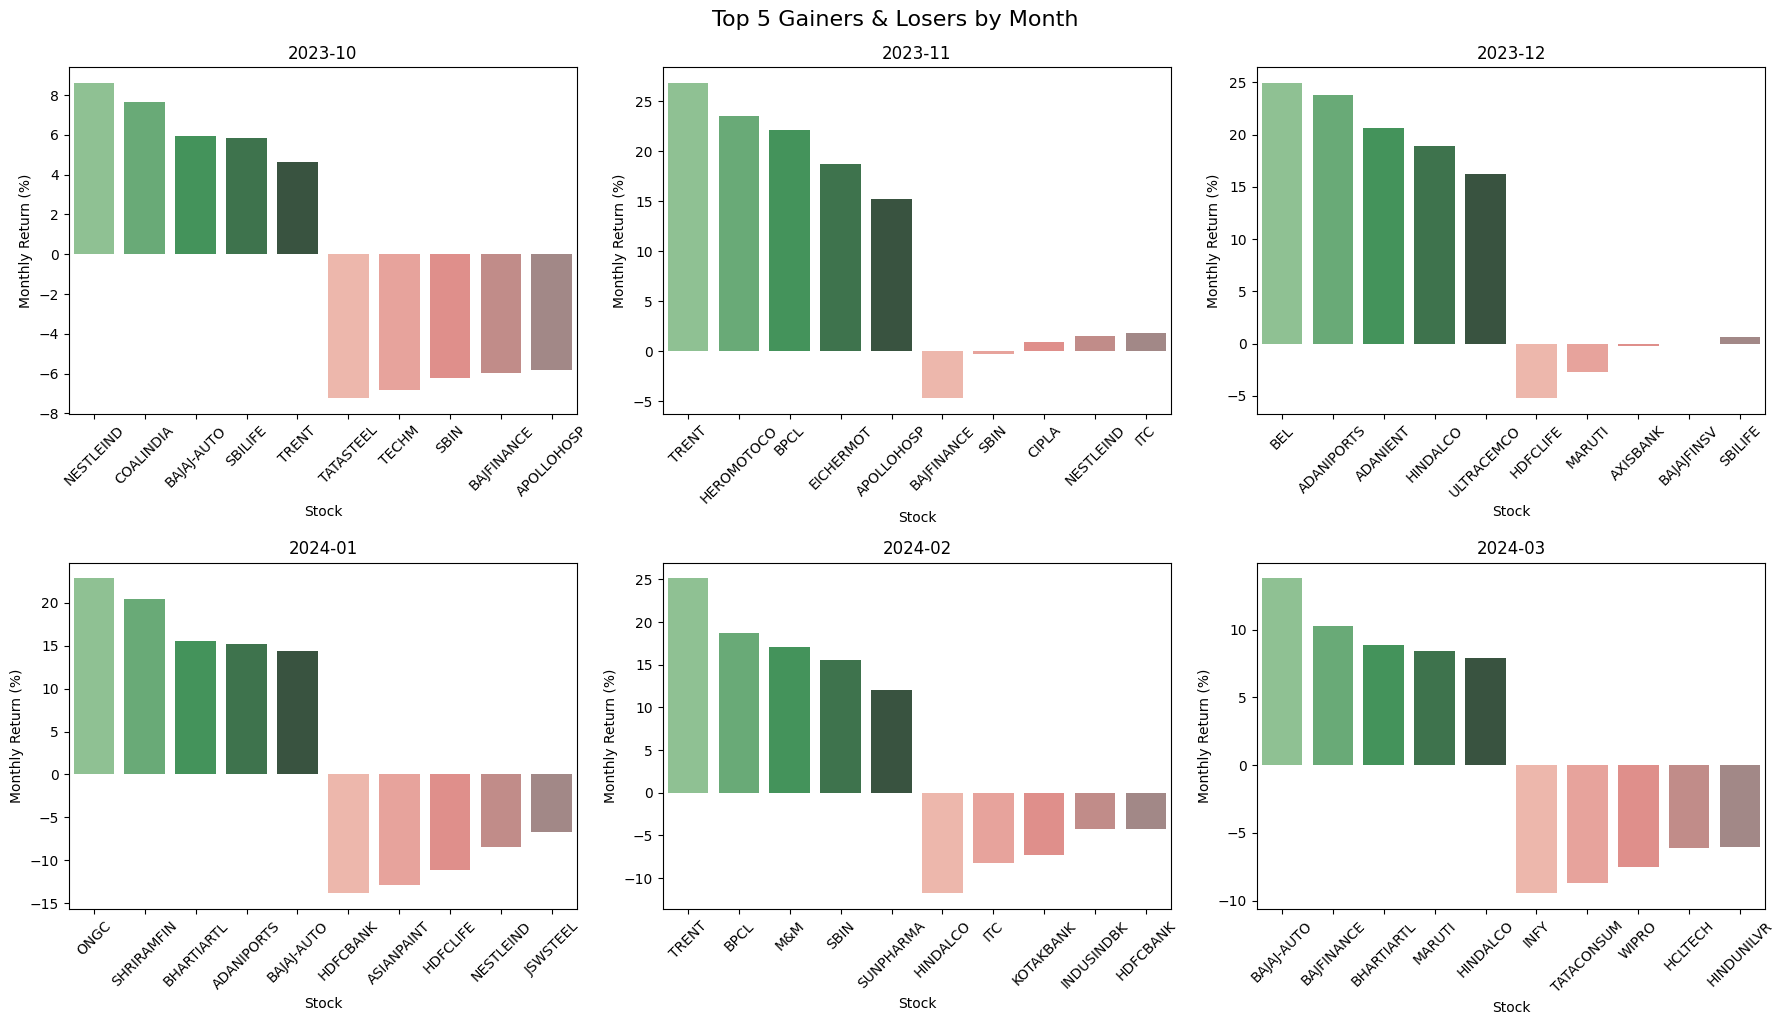

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_20236\3671369390.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gain, x='symbol', y='monthly_return', ax=ax, palette='Greens_d')
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_20236\3671369390.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=loss, x='symbol', y='monthly_return', ax=ax, palette='Reds_d', alpha=0.6)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_20236\3671369390.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gain, x='symbol', y='monthly_return', ax=ax, palett

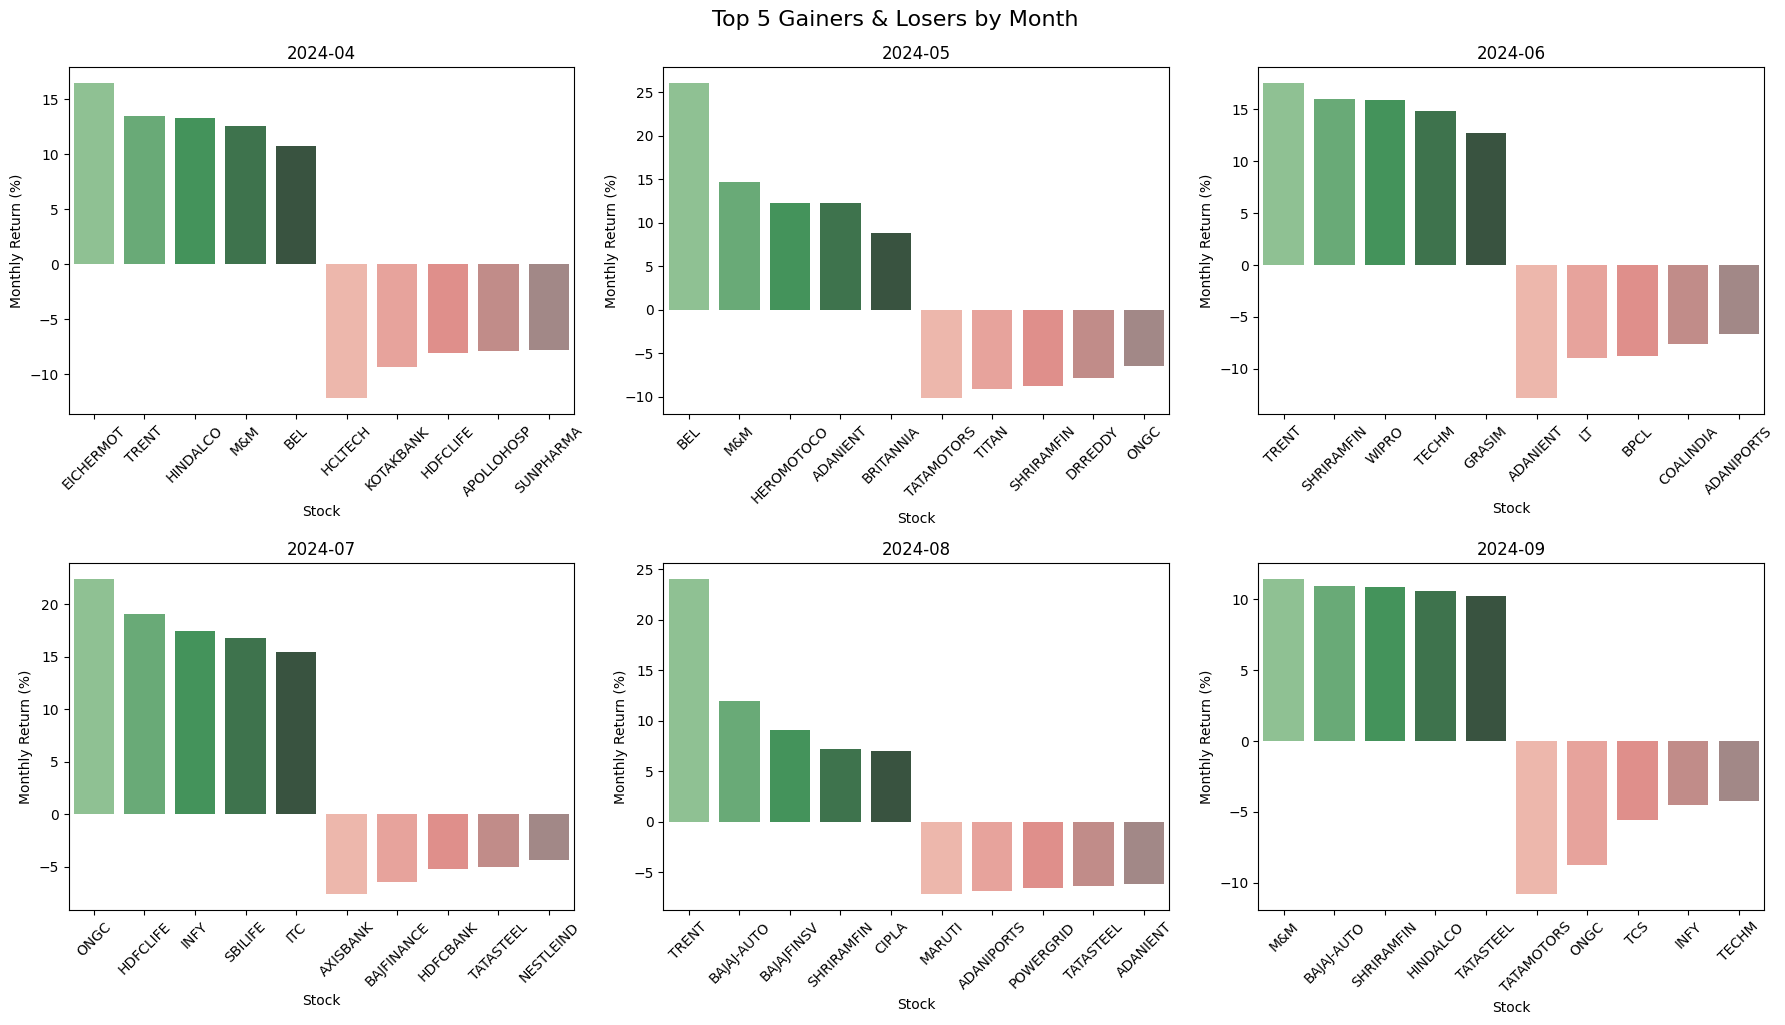

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_20236\3671369390.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gain, x='symbol', y='monthly_return', ax=ax, palette='Greens_d')
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_20236\3671369390.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=loss, x='symbol', y='monthly_return', ax=ax, palette='Reds_d', alpha=0.6)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_20236\3671369390.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gain, x='symbol', y='monthly_return', ax=ax, palett

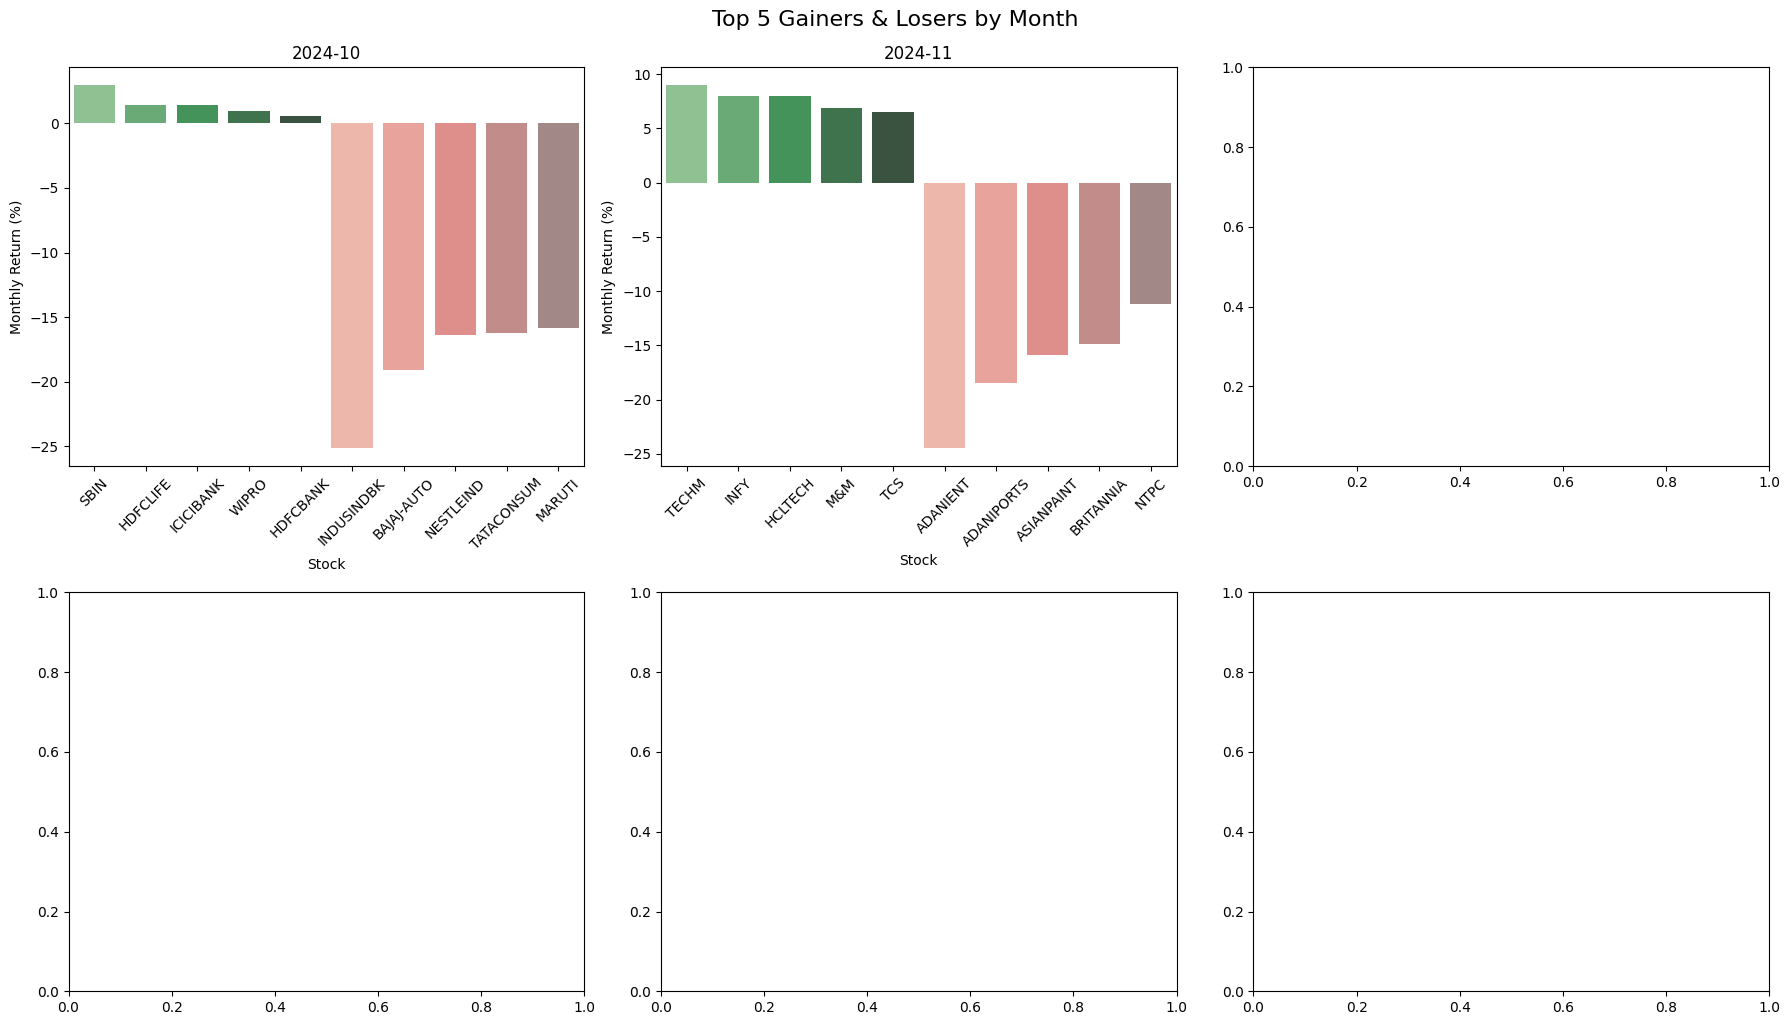

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and prepare the data
df = pd.read_csv("D:/stock analysis/all_stocks.csv")
df.columns = df.columns.str.strip().str.lower()
df['date'] = pd.to_datetime(df['date'], errors='coerce')  # Handles both "2023-10-03" and "03-10-2023"
df = df.sort_values(['symbol', 'date'])

# Create year-month column
df['month'] = df['date'].dt.to_period('M')

# Calculate first and last closing price for each stock per month
monthly_returns = df.groupby(['symbol', 'month']).agg(
    month_start=('close', 'first'),
    month_end=('close', 'last')
).reset_index()

# Calculate monthly percentage return
monthly_returns['monthly_return'] = (
    (monthly_returns['month_end'] - monthly_returns['month_start']) / monthly_returns['month_start']
) * 100

# Extract top 5 gainers and losers for each month
gainers_list = []
losers_list = []

for month, group in monthly_returns.groupby('month'):
    top5 = group.nlargest(5, 'monthly_return').copy()
    bottom5 = group.nsmallest(5, 'monthly_return').copy()
    top5['month'] = str(month)
    bottom5['month'] = str(month)
    gainers_list.append(top5)
    losers_list.append(bottom5)

top_gainers = pd.concat(gainers_list)
top_losers = pd.concat(losers_list)

# Save to CSV
top_gainers.to_csv("top_5_gainers_monthly.csv", index=False)
top_losers.to_csv("top_5_losers_monthly.csv", index=False)

# Plotting gainers and losers per month (6 months per figure)
unique_months = top_gainers['month'].unique()
n = len(unique_months)

for i in range(0, n, 6):  # Two figures if there are 12 months
    fig, axs = plt.subplots(2, 3, figsize=(18, 10))
    axs = axs.flatten()

    for j, month in enumerate(unique_months[i:i+6]):
        ax = axs[j]
        gain = top_gainers[top_gainers['month'] == month]
        loss = top_losers[top_losers['month'] == month]

        sns.barplot(data=gain, x='symbol', y='monthly_return', ax=ax, palette='Greens_d')
        sns.barplot(data=loss, x='symbol', y='monthly_return', ax=ax, palette='Reds_d', alpha=0.6)

        ax.set_title(f"{month}")
        ax.set_ylabel('Monthly Return (%)')
        ax.set_xlabel('Stock')
        ax.tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.suptitle("Top 5 Gainers & Losers by Month", fontsize=16, y=1.02)
    plt.show()

In [35]:
pip install pandas sqlalchemy

     ---------------------------------------- 2.1/2.1 MB 82.2 kB/s eta 0:00:00
     ------------------------------------ 295.0/295.0 KB 246.3 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Manigandan.N\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


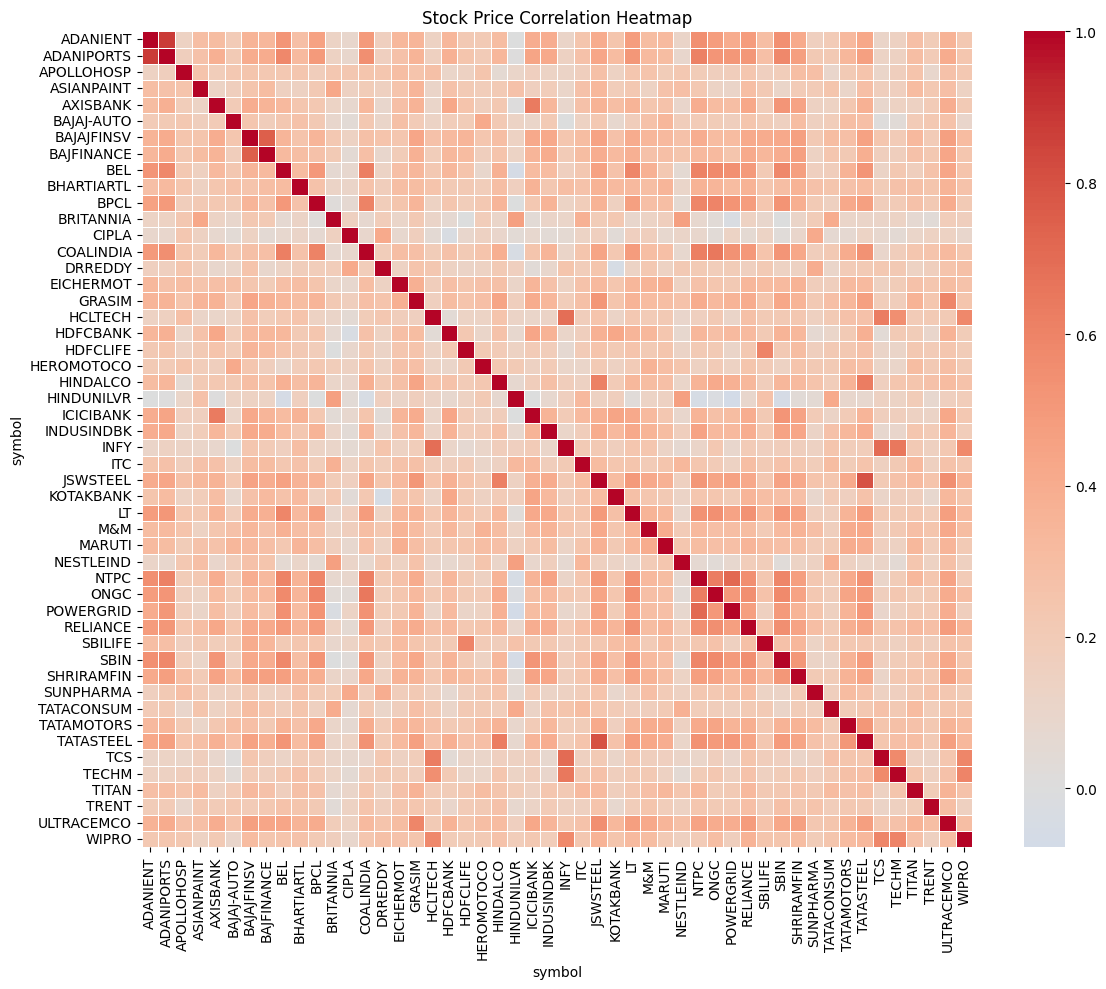

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and clean dataset
df = pd.read_csv("D:/stock analysis/all_stocks.csv")
df.columns = df.columns.str.strip().str.lower()

# Ensure date is datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')  # Handles both "2023-10-03" and "03-10-2023"

# Pivot to get closing prices in matrix format
price_matrix = df.pivot(index='date', columns='symbol', values='close')

# Compute daily returns
returns = price_matrix.pct_change().dropna()

# Correlation matrix
correlation_matrix = returns.corr()

# Save correlation matrix to CSV
correlation_matrix.to_csv("correlation_matrix.csv")

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0, annot=False, linewidths=0.5)
plt.title('Stock Price Correlation Heatmap')
plt.tight_layout()
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7184\649869368.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sector_returns.index, y=sector_returns.values, palette="viridis")


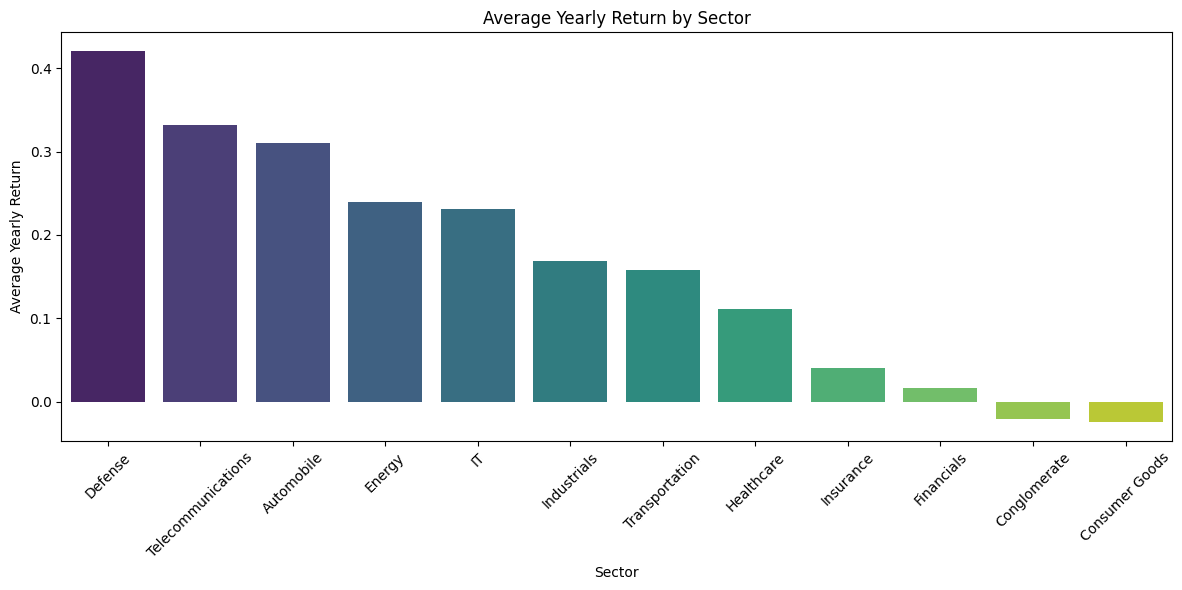

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV
df = pd.read_csv("D:/stock analysis/all_stocks.csv")
df.columns = df.columns.str.strip().str.lower()

# Convert date to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df = df.dropna(subset=['date'])  # Remove rows with invalid dates
df['year'] = df['date'].dt.year

# Sector mapping
sector_map = {
    'ADANIENT': 'Conglomerate',
    'ADANIPORTS': 'Transportation',
    'APOLLOHOSP': 'Healthcare',
    'ASIANPAINT': 'Consumer Goods',
    'AXISBANK': 'Financials',
    'BAJAJ-AUTO': 'Automobile',
    'BAJAJFINSV': 'Financials',
    'BAJFINANCE': 'Financials',
    'BEL': 'Defense',
    'BHARTIARTL': 'Telecommunications',
    'BPCL': 'Energy',
    'BRITANNIA': 'Consumer Goods',
    'CIPLA': 'Healthcare',
    'COALINDIA': 'Energy',
    'DRREDDY': 'Healthcare',
    'EICHERMOT': 'Automobile',
    'GRASIM': 'Industrials',
    'HCLTECH': 'IT',
    'HDFCBANK': 'Financials',
    'HDFCLIFE': 'Insurance'
}

# Add sector column
df['sector'] = df['symbol'].map(sector_map)
df = df.dropna(subset=['sector'])  # Remove any unmatched symbols

# Calculate yearly return for each stock
yearly = df.sort_values('date').groupby(['symbol', 'year']).agg(
    year_start=('close', 'first'),
    year_end=('close', 'last'),
    sector=('sector', 'first')
).reset_index()
yearly['yearly_return'] = (yearly['year_end'] - yearly['year_start']) / yearly['year_start']

# Sector-wise average return
sector_returns = yearly.groupby('sector')['yearly_return'].mean().sort_values(ascending=False)

# Save to CSV
sector_returns.to_csv("sectorwise_performance.csv")

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=sector_returns.index, y=sector_returns.values, palette="viridis")
plt.xticks(rotation=45)
plt.title('Average Yearly Return by Sector')
plt.ylabel('Average Yearly Return')
plt.xlabel('Sector')
plt.tight_layout()
plt.show()


In [32]:
!pip install mysql-connector-python


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
pip install pymysql


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [34]:
pip install sqlalchemy

  Using cached sqlalchemy-2.0.40-cp310-cp310-win_amd64.whl (2.1 MB)
     ---------------------------------------- 0.0/295.0 kB ? eta -:--:--
     ----- ------------------------------- 41.0/295.0 kB 991.0 kB/s eta 0:00:01
     ------------ -------------------------- 92.2/295.0 kB 1.1 MB/s eta 0:00:01
     ------------------- ------------------ 153.6/295.0 kB 1.1 MB/s eta 0:00:01
     ------------------------------------ - 286.7/295.0 kB 1.6 MB/s eta 0:00:01
     -------------------------------------- 295.0/295.0 kB 1.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [41]:
from sqlalchemy import create_engine
import pandas as pd

# Your credentials
user = '2LLo4bZkC31yEUV.root'
password = 'LuChtj8gRkjbD3XE'
host = "gateway01.us-west-2.prod.aws.tidbcloud.com"
port = 4000
database = 'test'

# Enable SSL by setting ssl to {"ssl": {}}
ssl_args = {"ssl": {}}

engine = create_engine(
    f"mysql+pymysql://{user}:{password}@{host}:{port}/{database}",
    connect_args=ssl_args
)


In [3]:
import pandas as pd
from sqlalchemy import create_engine

# Connection credentials
user = '2LLo4bZkC31yEUV.root'
password = 'LuChtj8gRkjbD3XE'
host = "gateway01.us-west-2.prod.aws.tidbcloud.com"
port = 4000
database = 'test'

# Secure connection using SSL
connect_args = {
    "ssl": {
        "ssl_ca": "/path/to/public-cert.pem"  # 🔺 Required!
    }
}

# Create SQLAlchemy engine
engine = create_engine(
    f"mysql+pymysql://{user}:{password}@{host}:{port}/{database}",
    connect_args=connect_args
)


# Example: Upload one file
#df = pd.read_csv("sectorwise_performance.csv")
#df.to_sql("sectorwise_performance", con=engine, if_exists="replace", index=False)
csv_files = [
    ('top_volatility_stocks.csv', 'volatility_analysis'),
    ('cumulative_return.csv', 'cumulative_return'),
    #('sectorwise_performance.csv', 'sectorwise_performance'),
    ('correlation_matrix.csv', 'correlation_matrix'),
    ('top_5_gainers_monthly.csv', 'top_5_gainers_monthly'),
    ('top_5_losers_monthly.csv', 'top_5_losers_monthly'),
]

for file, table in csv_files:
    try:
        df = pd.read_csv(file)
        df.to_sql(table, con=engine, if_exists="replace", index=False)
        print(f"✅ Uploaded {file} to table '{table}'")
    except Exception as e:
        print(f"❌ Failed to upload {file}: {e}")

✅ Uploaded top_volatility_stocks.csv to table 'volatility_analysis'
✅ Uploaded cumulative_return.csv to table 'cumulative_return'
✅ Uploaded correlation_matrix.csv to table 'correlation_matrix'
✅ Uploaded top_5_gainers_monthly.csv to table 'top_5_gainers_monthly'
✅ Uploaded top_5_losers_monthly.csv to table 'top_5_losers_monthly'
